In [50]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
excel = pd.ExcelFile("European attitudes towards energy policies_SP555_VOL_A.xlsx")
print(excel.sheet_names)

#excel= data.iloc[8:]
#print(excel)
#print(data.iloc[5])


['Content', 'B', 'QC1', 'QC2', 'QC2T', 'QC3_1', 'QC3_2', 'QC3_3', 'QC3_4', 'QC3_5', 'QC4a', 'QC4b', 'QC4T', 'QC5a', 'QC5b', 'QC5T', 'QC6', 'QC7', 'QC8_1', 'QC8_2', 'QC8_3', 'QC9', 'QC9a', 'QC9b', 'QC10', 'QC10T', 'QC11', 'QC11T', 'QC12', 'QC12T', 'D15a', 'D15a_2', 'C14', 'D15b', 'D15b_2', 'SD28', 'SD29', 'D11', 'D11R', 'D7', 'D7R', 'D8', 'D8c', 'D10', 'D25', 'D40a', 'D40b', 'D40c', 'D40', 'D40R', 'D60', 'D62_1', 'D62_2', 'D62_3', 'D62_4', 'D62R', 'D63', 'D70', 'D70a', 'D1', 'D1_2', 'D1_3', 'D71_1', 'D71_2', 'D71_3', 'C2', 'D78', 'D73_1', 'D73_2', 'D73_3', 'SD18a', 'SD18b', 'D72_1', 'D72_2', 'SD20']


In [52]:
# read specific sheet, without columns set, since column names change in the sheet
QC1 = pd.read_excel(excel, sheet_name="QC1", header=None)

# QUESTIONS FILTERING
QC1_questions = QC1.iloc[8:, 1:2].reset_index(drop=True)
rows_to_drop = [0,2]  # The 10th row becomes index 1 after slicing
QC1_questions = QC1_questions.drop(index=rows_to_drop).reset_index(drop=True)
QC1_questions_eng = QC1_questions.iloc[::2].reset_index(drop=True) # drop every second row (french questions)
QC1_questions_eng = QC1_questions_eng.drop(index=0).reset_index(drop=True) # drop total values row
print(QC1_questions.columns)
print("QC1_questions English Shape:", QC1_questions_eng.shape)
print("QC1_questions English:", QC1_questions_eng)

# DATA FILTERING
QC1_data = QC1.iloc[8:, 2:].reset_index(drop=True)
#print(QC1_data.iloc[0:3,:])
QC1_data = QC1_data.drop(index=2).reset_index(drop=True) #NaN values
#print(QC1_data.iloc[0])
QC1_data.columns = QC1_data.iloc[0]
QC1_data = QC1_data[1:].reset_index(drop=True)
QC1_data_percent = QC1_data.iloc[::2].reset_index(drop=True) # drop every second row (absoute values)
QC1_data_percent = QC1_data_percent.drop(index=0).reset_index(drop=True) # drop total values row
QC1_data_percent.replace("-", 0, inplace=True)
#print(QC1_data.columns)
print("QC1_data percentages shape:",QC1_data_percent.shape)
print("QC1_data percentages:", QC1_data_percent)
#print(QC1_data["UE27\nEU27"])


Index([1], dtype='int64')
QC1_questions English Shape: (12, 1)
QC1_questions English:                                                     1
0   Coordinating European countries on energy matters
1   Improving energy infrastructure between and ac...
2   Preventing electricity black-outs and energy s...
3                 Driving European climate neutrality
4   Decreasing energy consumption across Europe - ...
5          Ensuring nuclear energy is safe and secure
6   Supporting countries outside the European Unio...
7         Investing in innovative energy technologies
8   Ensuring more affordable energy prices for con...
9                                 Other (SPONTANEOUS)
10                    Prefer not to say (SPONTANEOUS)
11                                         Don't know
QC1_data percentages shape: (12, 30)
QC1_data percentages: 0   UE27\nEU27    BE    BG    CZ    DK   D-W    DE   D-E    EE    IE  ...  \
0         0.27  0.24  0.17  0.21  0.19  0.37  0.36  0.36  0.22  0.26  ...   

C:\Users\Elena\AppData\Local\Temp\ipykernel_2120\882217246.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QC1_data_percent.replace("-", 0, inplace=True)


In [53]:

QC1_df = pd.concat([QC1_questions_eng, QC1_data_percent], axis=1)
QC1_df = QC1_df.rename(columns={QC1_df.columns[0]: "Question"})
QC1_df


,Question,UE27\nEU27,BE,BG,CZ,DK,D-W,DE,D-E,EE,...,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE
0,Coordinating European countries on energy matters,0.27,0.24,0.17,0.21,0.19,0.37,0.36,0.36,0.22,...,0.31,0.25,0.36,0.18,0.26,0.18,0.20,0.17,0.20,0.49
1,Improving energy infrastructure between and ac...,0.27,0.27,0.24,0.22,0.37,0.31,0.30,0.27,0.28,...,0.33,0.38,0.30,0.20,0.23,0.23,0.26,0.20,0.31,0.40
2,Preventing electricity black-outs and energy s...,0.22,0.24,0.29,0.20,0.24,0.24,0.25,0.29,0.32,...,0.14,0.27,0.34,0.20,0.17,0.23,0.20,0.24,0.32,0.22
3,Driving European climate neutrality,0.25,0.24,0.16,0.15,0.37,0.34,0.32,0.23,0.19,...,0.19,0.33,0.32,0.25,0.23,0.14,0.18,0.21,0.39,0.34
4,Decreasing energy consumption across Europe - ...,0.30,0.27,0.27,0.28,0.33,0.23,0.24,0.26,0.25,...,0.29,0.32,0.29,0.32,0.31,0.29,0.31,0.37,0.24,0.28
5,Ensuring nuclear energy is safe and secure,0.21,0.27,0.22,0.28,0.23,0.17,0.16,0.14,0.22,...,0.13,0.29,0.20,0.19,0.16,0.20,0.19,0.30,0.29,0.27
6,Supporting countries outside the European Unio...,0.16,0.14,0.13,0.11,0.23,0.13,0.13,0.13,0.08,...,0.21,0.15,0.17,0.20,0.17,0.16,0.15,0.13,0.16,0.19
7,Investing in innovative energy technologies,0.33,0.28,0.30,0.23,0.34,0.38,0.36,0.30,0.27,...,0.32,0.38,0.28,0.25,0.33,0.23,0.36,0.30,0.31,0.38
8,Ensuring more affordable energy prices for con...,0.40,0.42,0.43,0.35,0.31,0.41,0.41,0.43,0.41,...,0.48,0.32,0.38,0.27,0.45,0.36,0.43,0.43,0.38,0.22
9,Other (SPONTANEOUS),0.01,0.00,0.01,0.01,0.03,0.00,0.01,0.02,0.02,...,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00


# PCA of Questions

(12, 2)


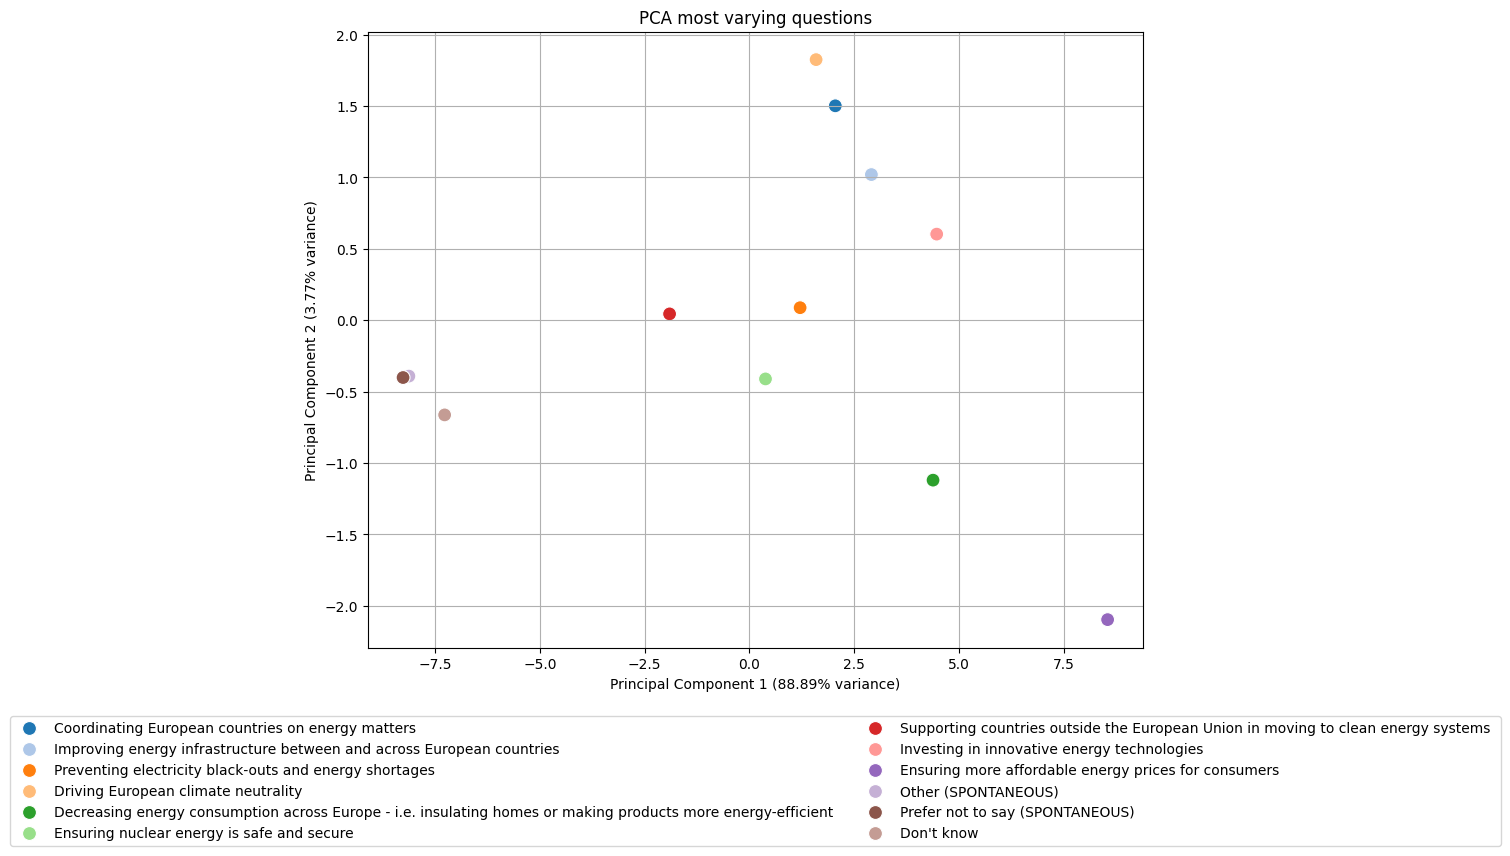

In [54]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(QC1_data_percent)

# Apply PCA
pca = PCA(n_components=2)  # Top 2 components for simplicity
pca_result = pca.fit_transform(data_scaled)
print(pca_result.shape)
#print(pca_result)

# Create a DataFrame with the results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Add the questions back to the PCA dataframe
pca_df["Question"] = QC1_df["Question"]

#pca_df.to_csv("PCA_Questions")

# Plot the biplot
plt.figure(figsize=(10, 8))

# Plot the countries as points
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Question"], palette="tab20", s=100)

# Add labels and title
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA most varying questions")
plt.grid(True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

# PCA of Countries

(30, 2)


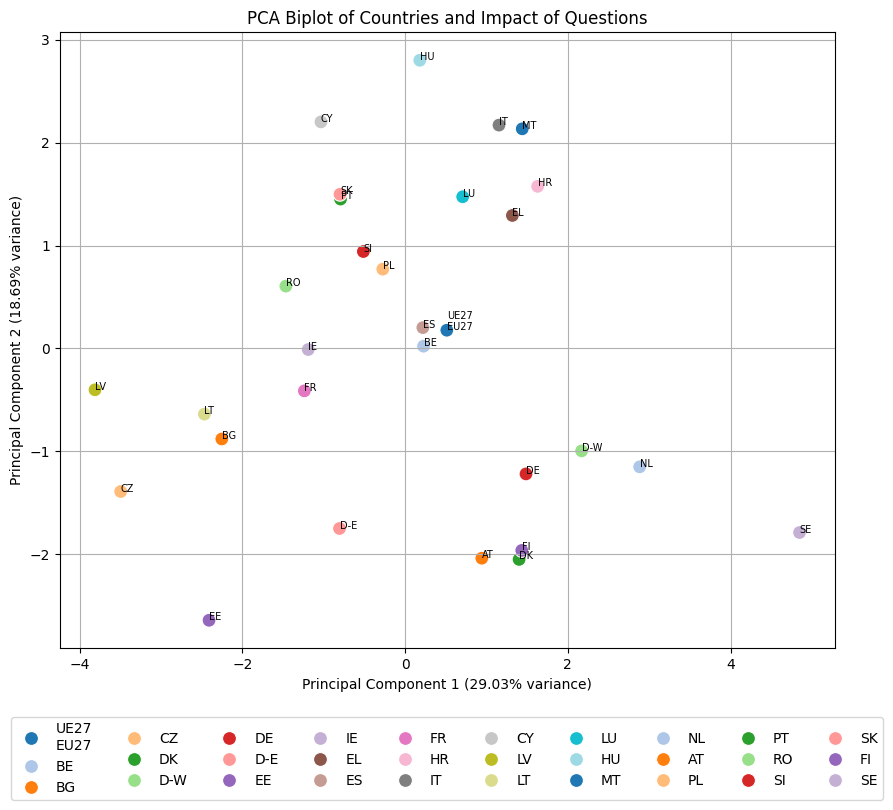

In [55]:
# Standardize the data
QC1_data_percent_trans = QC1_data_percent.T
scaler = StandardScaler()
data_scaled = scaler.fit_transform(QC1_data_percent_trans)

# Apply PCA
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(data_scaled)
print(pca_result.shape)
#print(pca_result)

# Create a DataFrame with the results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df["Countries"] = QC1_data_percent.columns

#pca_df.to_csv("PCA_Countries")

plt.figure(figsize=(10, 8))

# Plot the countries as points
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Countries"], palette="tab20", s=100)

# Add labels and title
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA Biplot of Countries and Impact of Questions")
plt.grid(True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=10)
for i in range(pca_df.shape[0]):
    plt.text(pca_df["PC1"][i], pca_df["PC2"][i], pca_df["Countries"][i], fontsize=7)
plt.show()